# Mapping cell types to brain Visium data

Load libraries

In [1]:
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.io import mmread
from scipy.io import mmwrite
from scipy.sparse import csr_matrix

import cell2location
import scvi

from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
import seaborn as sns

results_folder = '../results/cell2loc_Da_10/'

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
Global seed set to 0


Load snRNA-seq data

In [2]:
original_counts = np.round(csr_matrix(mmread("../data/processed/axolotl_parts/ax_regions_counts.mtx")))
original_meta = pd.read_csv("../data/processed/axolotl_parts/ax_regions_meta.csv", index_col = 0)
original_genes = pd.read_csv("../data/processed/axolotl_parts/ax_regions_genes.csv", index_col = 0)

pal_data = ad.AnnData(original_counts, obs=original_meta, var = original_genes)

In [3]:
pal_data = pal_data[pal_data.obs.cellclusters!="glut_SUBSET_23",]

Filter genes

Trying to set attribute `.var` of view, copying.


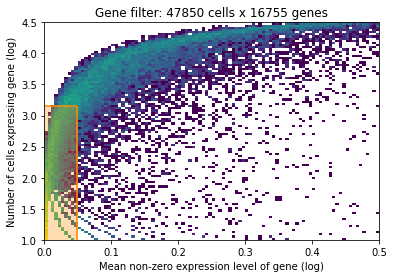

In [4]:
from cell2location.utils.filtering import filter_genes
selected = filter_genes(pal_data, cell_count_cutoff=5, cell_percentage_cutoff2=0.03, nonz_mean_cutoff=1.12)
pal_data = pal_data[:, selected].copy()

Prepare data for regression

In [5]:
# prepare anndata for the regression model
scvi.data.setup_anndata(adata=pal_data,
                        # 10X reaction / sample / batch
                        batch_key='chem',
                        # cell type, covariate used for constructing signatures
                        labels_key='cellclusters',
                        # multiplicative technical effects (platform, 3' vs 5', donor effect)
                        categorical_covariate_keys=['sample']
                       )
scvi.data.view_anndata_setup(pal_data)

INFO     Using batches from adata.obs["chem"]                                                
INFO     Using labels from adata.obs["cellclusters"]                                         
INFO     Using data from adata.X                                                             


/home/tpires/bin/miniconda3/envs/cell2loc_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function setup_anndata is deprecated; Please use the model-specific setup_anndata methods instead. The global method will be removed in version 0.15.0.


INFO     Successfully registered anndata object containing 47850 cells, 16755 vars, 2        
         batches, 94 labels, and 0 proteins. Also registered 1 extra categorical covariates  
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/home/tpires/bin/miniconda3/envs/cell2loc_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.


Anndata setup with scvi-tools version 0.14.3.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 47850 │
│             Vars             │ 16755 │
│            Labels            │  94   │
│           Batches            │   2   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   1   │
│ Extra Continuous Covariates  │   0   │
└──────────────────────────────┴───────┘

                    SCVI Data Registry                    
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃          scvi-tools Location           ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │                adata.X                 │
│ batch_indices │        adata.obs['_scvi_batch']        │
│    labels     │       adata.obs['_scvi_labels']        │
│   cat_covs    │ adata.obsm['_scvi_extra_categoricals'] │
└───────────────┴────────────────────────────────────────┘

                            Label Categories                            
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃     Categories     ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['cellclusters'] │   GABA_SUBSET_0    │          0          │
│                           │   GABA_SUBSET_1    │          1          │
│                           │   GABA_SUBSET_10   │          2          │
│                           │   GABA_SUBSET_11   │          3          │
│                           │   GABA_SUBSET_12   │          4          │
│                           │   GABA_SUBSET_13   │          5          │
│                           │   GABA_SUBSET_14   │          6          │
│                           │   GABA_SUBSET_15   │          7          │
│                           │   GABA_SUBSET_16   │          8          │
│                           │   GABA_SUBSET_17   │          9          │
│                           │   GABA_SUBSET_18   │         10          │
│                           │   GABA_SUBSET_19   │         11          │
│                           │   GABA_SUBSET_2    │         12          │
│                           │   GABA_SUBSET_20   │         13          │
│                           │   GABA_SUBSET_21   │         14          │
│                           │   GABA_SUBSET_22   │         15          │
│                           │   GABA_SUBSET_23   │         16          │
│                           │   GABA_SUBSET_24   │         17          │
│                           │   GABA_SUBSET_25   │         18          │
│                           │   GABA_SUBSET_26   │         19          │
│                           │   GABA_SUBSET_27   │         20          │
│                           │   GABA_SUBSET_28   │         21          │
│                           │   GABA_SUBSET_29   │         22          │
│                           │   GABA_SUBSET_3    │         23          │
│                           │   GABA_SUBSET_4    │         24          │
│                           │   GABA_SUBSET_5    │         25          │
│                           │   GABA_SUBSET_6    │         26          │
│                           │   GABA_SUBSET_7    │         27          │
│                           │   GABA_SUBSET_8    │         28          │
│                           │   GABA_SUBSET_9    │         29          │
│                           │   endothelial_11   │         30          │
│                           │   endothelial_12   │         31          │
│                           │   endothelial_14   │         32          │
│                           │    epen_clus_0     │         33          │
│                           │    epen_clus_1     │         34          │
│                           │    epen_clus_10    │         35          │
│                           │    epen_clus_11    │         36          │
│                           │    epen_clus_12    │         37          │
│                           │    epen_clus_13    │         38          │
│                           │    epen_clus_14    │         39          │
│                           │    epen_clus_2     │         40          │
│                           │    epen_clus_3     │         41          │
│                           │    epen_clus_4     │         42          │
│                           │    epen_clus_5     │         43          │
│                           │    epen_clus_6     │         44          │
│                           │    epen_clus_7     │         45          │
│                           │    epen_clus_8     │         46          │
│                           │    epen_clus_9     │         47          │
│                           │   glut_SUBSET_0    │         48          │
│                           │   glut_SUBSET_1    │         49          │
│                           │   glut_SUBSET_10   │        

                    Batch Categories                    
┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃  Source Location  ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['chem'] │  multiome  │          0          │
│                   │    v3.1    │          1          │
└───────────────────┴────────────┴─────────────────────┘

               Extra Categorical Variables                
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃   Source Location   ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['sample'] │     D1     │          0          │
│                     │     D2     │          1          │
│                     │     L1     │          2          │
│                     │     L2     │          3          │
│                     │     M1     │          4          │
│                     │     M2     │          5          │
│                     │  animal1   │          6          │
│                     │  animal3   │          7          │
│                     │            │                     │
└─────────────────────┴────────────┴─────────────────────┘

Train the regression model

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
/home/tpires/bin/miniconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:99: UserWarning: you passed in a val_dataloader but have no validation_step. Skipping val loop


Epoch 175/175: 100%|████████████| 175/175 [1:03:32<00:00, 21.79s/it, v_num=1, elbo_train=5.83e+8]


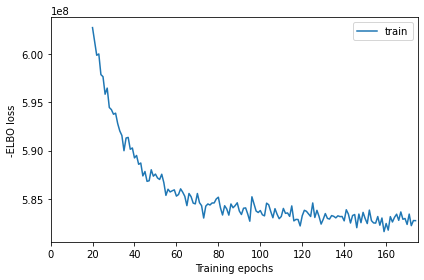

In [6]:
# create and train the regression model
from cell2location.models import RegressionModel
mod = RegressionModel(pal_data)

# Use all data for training (validation not implemented yet, train_size=1)
mod.train(max_epochs=175, batch_size=2500, train_size=1, lr=0.002, use_gpu=False)

# plot ELBO loss history during training, removing first 20 epochs from the plot
mod.plot_history(20)

Results

In [7]:
results_folder = '../results/cell2loc/'

# create paths and names to results folders for reference regression and cell2location models
ref_run_name = f'{results_folder}/reference_signatures'
run_name = f'{results_folder}/cell2location_map'

# In this section, we export the estimated cell abundance (summary of the posterior distribution).
pal_data = mod.export_posterior(
    pal_data, sample_kwargs={'num_samples': 1000, 'batch_size': 2500, 'use_gpu': False}
)

# Save model
mod.save(f"{ref_run_name}", overwrite=True)

# Save anndata object with results
adata_file = f"{ref_run_name}/sc.h5ad"
pal_data.write(adata_file)
adata_file

Sampling global variables, sample: 100%|███████████████████████| 999/999 [02:03<00:00,  8.07it/s]


/home/tpires/bin/miniconda3/envs/cell2loc_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
... storing 'sample' as categorical
/home/tpires/bin/miniconda3/envs/cell2loc_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
... storing 'chem' as categorical
/home/tpires/bin/miniconda3/envs/cell2loc_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
... stori

'../results/cell2loc//reference_signatures/sc.h5ad'

Read file if needed

In [2]:
pal_data = sc.read_h5ad('../results/cell2loc//reference_signatures/sc.h5ad')
mod = cell2location.models.RegressionModel.load('../results/cell2loc/reference_signatures', 
                                                adata = pal_data)

INFO     Using data from adata.X                                                             


/home/tpires/bin/miniconda3/envs/cell2loc_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function transfer_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.


INFO     Registered keys:['X', 'batch_indices', 'labels', 'cat_covs', 'ind_x']               
INFO     Successfully registered anndata object containing 47850 cells, 16755 vars, 2        
         batches, 94 labels, and 0 proteins. Also registered 1 extra categorical covariates  
         and 0 extra continuous covariates.                                                  
INFO     Preparing underlying module for load                                                


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
/home/tpires/bin/miniconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:99: UserWarning: you passed in a val_dataloader but have no validation_step. Skipping val loop


Epoch 1/418:   0%|           | 1/418 [00:04<28:38,  4.12s/it, v_num=1, elbo_train=7.02e+8]


In [11]:
mod.plot_QC()

RuntimeError: self.samples is missing, please run self.export_posterior() first

Results per cluster

In [3]:
# export estimated expression in each cluster
if 'means_per_cluster_mu_fg' in pal_data.varm.keys():
    inf_aver = pal_data.varm['means_per_cluster_mu_fg'][[f'means_per_cluster_mu_fg_{i}'
                                    for i in pal_data.uns['mod']['factor_names']]].copy()
else:
    inf_aver = pal_data.var[[f'means_per_cluster_mu_fg_{i}'
                                    for i in pal_data.uns['mod']['factor_names']]].copy()
inf_aver.columns = pal_data.uns['mod']['factor_names']
inf_aver.iloc[0:5, 0:5]

,GABA_SUBSET_0,GABA_SUBSET_1,GABA_SUBSET_10,GABA_SUBSET_11,GABA_SUBSET_12
ZNF568,1.222659,0.903748,0.839935,1.295984,1.663732
ZNF79,0.518364,0.389469,0.325947,0.472370,0.684624
ZNF268,11.806858,7.647746,6.549891,10.236600,12.631486
ZNF850,4.049143,2.790739,2.652143,3.638906,4.941511
AMEX60DD201000005,0.104981,0.094170,0.062553,0.116142,0.111958


Load visium data

In [22]:
vis = sc.read_loom("/links/groups/treutlein/USERS/Ashley/projects/axolotl/experiments/20210201_axolotl_brain_52/data_processing/D1_113_sub_a.loom")

In [23]:
vis.X = np.round(vis.X)

In [15]:
vis.X

<604x10477 sparse matrix of type '<class 'numpy.float32'>'
	with 731548 stored elements in Compressed Sparse Row format>

In [20]:
len(vis.X.todense())

604

In [24]:
vis.X = vis.X.toarray()
vis.X

array([[0., 0., 2., ..., 0., 0., 0.],
       [0., 0., 2., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [7]:
# find shared genes and subset both anndata and reference signatures
intersect = np.intersect1d(vis.var_names, inf_aver.index)
vis = vis[:, intersect].copy()
inf_aver = inf_aver.loc[intersect, :].copy()

# prepare anndata for cell2location model
scvi.data.setup_anndata(adata=vis, continuous_covariate_keys = ["nCount_Spatial"])
scvi.data.view_anndata_setup(vis)

INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 604 cells, 10477 vars, 1 batches, 
         1 labels, and 0 proteins. Also registered 0 extra categorical covariates and 1 extra
         continuous covariates.                                                              
INFO     Please do not further modify adata until model is trained.                          


/home/tpires/bin/miniconda3/envs/cell2loc_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function setup_anndata is deprecated; Please use the model-specific setup_anndata methods instead. The global method will be removed in version 0.15.0.
/home/tpires/bin/miniconda3/envs/cell2loc_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.


Anndata setup with scvi-tools version 0.14.3.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │  604  │
│             Vars             │ 10477 │
│            Labels            │   1   │
│           Batches            │   1   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   1   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                       Batch Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃     Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_batch'] │     0      │          0          │
└──────────────────────────┴────────────┴─────────────────────┘

          Extra Continuous Variables          
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃       Source Location       ┃    Range     ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ adata.obs['nCount_Spatial'] │ 498 -> 14102 │
└─────────────────────────────┴──────────────┘

Train model

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
/home/tpires/bin/miniconda3/envs/cell2loc_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:99: UserWarning: you passed in a val_dataloader but have no validation_step. Skipping val loop


Epoch 15000/15000: 100%|█| 15000/15000 [1:25:34<00:00,  2.92it/s, v_num=1, elbo_train=1.95


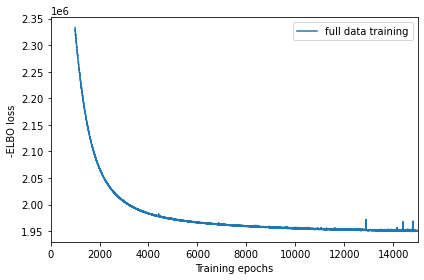

In [8]:
# create and train the model
mod2 = cell2location.models.Cell2location(
    vis, cell_state_df=inf_aver,
    # the expected average cell abundance: tissue-dependent
    # hyper-prior which can be estimated from paired histology:
    #N_cells_per_location=25,
    N_cells_per_location=10,
    # hyperparameter controlling normalisation of
    # within-experiment variation in RNA detection (using default here):
    detection_alpha=200
)

mod2.train(max_epochs=15000,
          # train using full data (batch_size=None)
          batch_size=None,
          # use all data points in training because
          # we need to estimate cell abundance at all locations
          train_size=1,
          use_gpu=False)

# plot ELBO loss history during training, removing first 100 epochs from the plot
mod2.plot_history(1000)
plt.legend(labels=['full data training']);

Export results

In [9]:
# create paths and names to results folders for reference regression and cell2location models
ref_run_name = f'{results_folder}/reference_signatures'
run_name = f'{results_folder}/cell2location_map'

# In this section, we export the estimated cell abundance (summary of the posterior distribution).
vis = mod2.export_posterior(
    vis, sample_kwargs={'num_samples': 1000, 'batch_size': mod2.adata.n_obs, 'use_gpu': False}
)

# Save model
mod2.save(f"{run_name}", overwrite=True)

# mod = cell2location.models.Cell2location.load(f"{run_name}", adata_vis)

# Save anndata object with results
adata_file = f"{run_name}/sp.h5ad"
vis.write(adata_file)
adata_file

Sampling global variables, sample: 100%|████████████████| 999/999 [01:41<00:00,  9.83it/s]


'../results/cell2loc_Da_10//cell2location_map/sp.h5ad'

In [10]:
# add 5% quantile, representing confident cell abundance, 'at least this amount is present',
# to adata.obs with nice names for plotting
vis.obs[vis.uns['mod']['factor_names']] = vis.obsm['q05_cell_abundance_w_sf']
vis.obs.to_csv(results_folder+"/predictions_cell2loc.csv")